<span style="color:orange;font-size:40px">**Improve Python speed**</span><br>
<span style="color:orange;font-size:15px">**Monday 03.06**</span>

&emsp; Python is a cool versatile programming language known for its simplicity, readability, and broad applicability across multiple domains. This makes Python especially useful for rapid development and prototyping. 

&emsp; However, a big problem with Python is that it is slower than other programming languages, particularly when handling computation-heavy tasks (most of our bioinformatic tasks).

&emsp; There are multiple scenarious when speeding the code can be crucial:
<br><br>
<ul>
    <li> <span style="color:pink;font-size:15px"></span> When running heavy tasks that require multiple passes through the code; </li><br>
    <li> <span style="color:pink;font-size:15px"></span> When releasing tools for the public (or even indors softwares); </li><br>
    <li> <span style="color:pink;font-size:15px"></span> When scaling applications to handle larger datasets or increased user load; </li><br>
    <li> <span style="color:pink;font-size:15px"></span> etc. </li><br>
</ul>

<img src="./IMG/Think_Sanic.jpg" alt="HAHA" width="400"/>

<br><br>
&emsp; But before we start optimizing all of our code (productive procrastination), we need to first think if it is really necessary. So, <b>DON'T DO IT IF</b>...
<br><br>
<ul>
    <li> <span style="color:pink;font-size:15px"></span> When the code is evolving fast on its application, don't do a premature optimization. This is especially true if maintness is required constantly. Optimization should be the last part; </li><br>
    <li> <span style="color:pink;font-size:15px"></span> When the code is very simplistic and you'll not use it again. Why waste a day for a code that can run in 15 min once? </li><br>
    <li> <span style="color:pink;font-size:15px"></span> Super complex codes can be hard to fully optimize.  Maybe find bottlenecks on the code and focus on sub-parts of the code. </li><br>
    <li> <span style="color:pink;font-size:15px"></span> etc. </li><br>
</ul>

<span style="color:orange;font-size:30px"><b> Code </b></span><br>
<span style="color:orange;font-size:18px"><b> Example 1: Create [x] sequences of size [n] </b></span><br>

<span style="font-size:18px"><b> Python </b></span><br>

In [1]:
import random

In [2]:
# Generates random DNA sequences.
def create_seqs_py1(size, number_seqs):
    """
    Parameters:
    size        (int): Length of each DNA sequence.
    number_seqs (int): Number of DNA sequences to generate.
    
    Returns:
    list: A list of randomly generated DNA sequences.
    """
    
    nucleotides = ['A', 'T', 'G', 'C']
    sequences = []
    
    for _ in range(number_seqs):
        for _ in range(size):
            sequence = ''.join(random.choice(nucleotides))
            sequences.append(sequence)
    
    return sequences

<img src="IMG/List_comprh.jpg" alt="HAHA" width="400"/>
<br><br>

&emsp; Certain features in Python are faster due to their optimized implementation within the Python interpreter. 
<br><br>
<ul>
    <li> <span style="color:pink;font-size:15px"></span> List comprehensions: have background C implementation of the underlying loops, resulting in faster execution than loops; </li><br>
    <li> <span style="color:pink;font-size:15px"></span> Lambda: require less memory being more efficient with the python interpreter; </li><br>
    <li> <span style="color:pink;font-size:15px"></span> Some functions are optimized directly in C. </li><br>
</ul>

In [3]:
# Generates random DNA sequences.
def create_seqs_py2(size, number_seqs):
    """    
    Parameters:
    size (int): Length of each DNA sequence.
    number_seqs (int): Number of DNA sequences to generate.
    
    Returns:
    list: A list of randomly generated DNA sequences.
    """
    
    nucleotides = ['A', 'T', 'G', 'C']
    sequences = []
    
    for _ in range(number_seqs):
        sequence = ''.join(random.choice(nucleotides) for _ in range(size))
        sequences.append(sequence)
    
    return sequences

<span style="font-size:18px"><b> Numpy </b></span><br>

&emsp; It is probably the most used library in Python, and is much more faster than pure Python for NUMERICAL computations, since it uses C under the hood. The big advantage is that it allows you to calculate entire data-sets at the same time instead of having to loop (vectorization).

<span style="color:pink;font-size:15px"> &emsp; (a.) It is not as good to deal with strings compared to numbers (ints and floats). </span>

<span style="color:pink;font-size:15px"> &emsp; (b.) Might have some initial learning curve because of its specialized functions. </span>


In [4]:
import numpy as np

In [5]:
# Generates random DNA sequences.
def create_seqs_np(size, number_seqs):
    """    
    Parameters:
    size (int): Length of each DNA sequence.
    number_seqs (int): Number of DNA sequences to generate.
    
    Returns:
    list: A list of randomly generated DNA sequences.
    """
    
    sequences = np.empty((number_seqs, size), dtype=np.uint8)

    for i in range(number_seqs):
        sequences[i] = np.random.randint(4, size=size)  # Represent [A, T, G, C] as [0, 1, 2, 3]
    
    return sequences

<span style="font-size:18px"><b> Numba </b></span><br>

&emsp; Uses a function decorator (@jit) or (@njit) that transforms Python code into machine code. Most of the speed-up is by specifying the types of the input and output variables.

<span style="color:pink;font-size:15px"> &emsp; (a.) DON'T USE @jit. It can make your code slower than normal python. It basically tries to not use Python and when there is an error switches to Python </span>

<span style="color:pink;font-size:15px"> &emsp; (b.) Although it has compatibilities with Numpy, some functions and **args don't work. When this happens, it can be very very hard to decode, since the code errors are in Machine Language (binary code). </span>

<span style="color:pink;font-size:15px"> &emsp; (c.) Just as Numpy, it works much better when dealing with numbers (int or floats) intead of strings. </span>

In [165]:
from numba import njit, uint8, uint64, float32

In [7]:
# Generates random DNA sequences.
@njit(uint8[:, :](uint64, uint8))
def create_seqs_numba(size, number_seqs):
    """
    Parameters:
    size (int): Length of each DNA sequence.
    number_seqs (int): Number of DNA sequences to generate.
    
    Returns:
    numpy.ndarray: A 2D array of randomly generated DNA sequences.
    """
    
    sequences = np.empty((number_seqs, size), dtype=np.uint8)

    for i in range(number_seqs):
        for j in range(size):
            sequences[i, j] = np.random.randint(4)   # Represent [A, T, G, C] as [0, 1, 2, 3]

    return sequences

<span style="font-size:18px"><b> Cython </b></span><br>

&emsp; Compiles Python to C code. Again, it is important to add static variables to accelarate the code.

<span style="color:pink;font-size:15px"> &emsp; (a.) Slightly harder to make use of, since it requires to compile the code manually and to change the interpretability of the python code. </span>

- Create pyx file

- Create setup file

- Compile in shell &emsp; <b>python setup.py build_ext --inplace</b>

without inplace, the compiled extensions would be placed in a build directory

In [183]:
from create_seqs_cy import create_seqs_cython

<span style="color:lightgreen;font-size:18px"><b> Benchmarking </b></span><br>

In [10]:
import timeit, cProfile, sys

# Example usage
size = int(1e6)
number_seqs = 20

In [11]:
# Benchmark
time1 = timeit.timeit(lambda: create_seqs_py1(size, number_seqs), number=10)
time2 = timeit.timeit(lambda: create_seqs_py2(size, number_seqs), number=10)
time3 = timeit.timeit(lambda: create_seqs_np(size, number_seqs), number=10)
time4 = timeit.timeit(lambda: create_seqs_numba(size, number_seqs), number=10)
time5 = timeit.timeit(lambda: create_seqs_cython(size, number_seqs), number=10)

print("Time for loci_freqs_py1: ", time1)
print("Time for loci_freqs_py2: ", time2)
print("Time for loci_freqs_np: ", time3)
print("Time for loci_freqs_numba: ", time4)
print("Time for loci_freqs_cy: ", time5)

Time for loci_freqs_py1:  51.287019014002
Time for loci_freqs_py2:  35.117029277000256
Time for loci_freqs_np:  0.4871021219987597
Time for loci_freqs_numba:  0.228818190000311
Time for loci_freqs_cy:  2.253771298001084


/home/diogo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


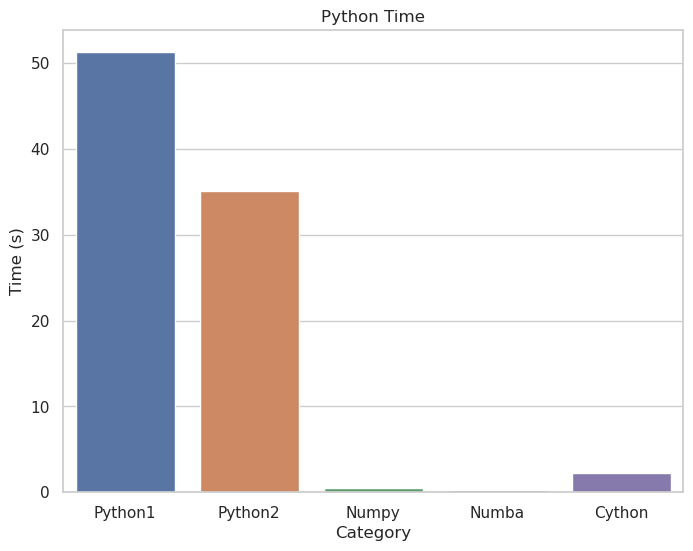

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

data = {
    'Category' : ['Python1', 'Python2', 'Numpy', 'Numba', 'Cython'],
    'Value' : [time1, time2, time3, time4, time5]}

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Category', y='Value', data=data)

# Add title and labels
bar_plot.set_title('Python Time')
bar_plot.set_xlabel('Category')
bar_plot.set_ylabel('Time (s)')

# Show the plot
plt.show()

&emsp; What should I check if I want to just analyze anomalies inside of my functions? I use "cProfile"

&emsp; <b>ncalls</b> &emsp;&emsp; Check if there is a function that is running much more than normal; 

&emsp; <b>cumtime</b> &ensp; is the time spent in the function/method including the time spent in the functions/methods that it calls; 

&emsp; <b>tottime</b> &emsp; is the time spent in the function/method excluding the time spent in the functions/methods that it calls.

In [ ]:
cProfile.run("create_seqs_py2(size, number_seqs)")

         160007486 function calls in 36.307 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 20000020    6.164    0.000   34.254    0.000 1941032531.py:16(<genexpr>)
        1    0.000    0.000   36.307   36.307 1941032531.py:2(create_seqs_py2)
        1    0.000    0.000   36.307   36.307 <string>:1(<module>)
 20000000   11.135    0.000   15.052    0.000 random.py:235(_randbelow_with_getrandbits)
 20000000   10.752    0.000   28.090    0.000 random.py:367(choice)
        1    0.000    0.000   36.307   36.307 {built-in method builtins.exec}
 40000000    2.286    0.000    2.286    0.000 {built-in method builtins.len}
       20    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
 20000000    1.287    0.000    1.287    0.000 {method 'bit_length' of 'int' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
 40007422    2.630    0.000    2.630    0.000 {meth

In [73]:
cProfile.run("create_seqs_cython(sizne, number_seqs)")

         3 function calls in 0.337 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.337    0.337    0.337    0.337 <string>:1(<module>)
        1    0.000    0.000    0.337    0.337 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




<span style="color:orange;font-size:18px"><b> Example 2: Calculate allele frequency for each loci </b></span><br>

<span style="font-size:18px"><b> Python </b></span><br>

In [78]:
from collections import Counter
import timeit

In [173]:
random_seqs1 = create_seqs_py2(size, number_seqs)

In [174]:
def loci_freqs_py(population):

    num_loci = len(population[0])
    allele_counts = [Counter() for _ in range(num_loci)]

    for genome in population:
        for locus in range(num_loci):
            allele_counts[locus][genome[locus]] += 1

    total_alleles = len(population)
    allele_frequencies = []

    for counter in allele_counts:
        frequencies = {}
        for key, count in counter.items():
            frequencies[key] = count / total_alleles
        allele_frequencies.append(frequencies)

    return allele_frequencies

<span style="font-size:18px"><b> Numpy </b></span><br>

In [110]:
random_seqs2 = create_seqs_np(size, number_seqs)

In [155]:
import numpy as np

def loci_freqs_numpy(population):
    
    allele_freqs = np.empty((4, population.shape[1]))
    for i in range(4):
        allele_freqs[i] = np.count_nonzero(random_seqs2 == i, axis=0)
    
    return allele_freqs/population.shape[0]

In [213]:
loci_freqs_numpy(random_seqs2)

array([[0.45, 0.25, 0.2 , ..., 0.25, 0.25, 0.1 ],
       [0.2 , 0.15, 0.3 , ..., 0.2 , 0.15, 0.3 ],
       [0.25, 0.3 , 0.3 , ..., 0.2 , 0.35, 0.2 ],
       [0.1 , 0.3 , 0.2 , ..., 0.35, 0.25, 0.4 ]])

<span style="font-size:18px"><b> Numba </b></span><br>

In [166]:
import numpy as np

@njit(float32[:, :](uint8[:, :]))
def loci_freqs_numba(population):
    
    allele_freqs = np.empty((4, population.shape[1]), dtype=float32)
    for i in range(4):
        allele_freqs[i] = np.count_nonzero(random_seqs2 == i, axis=0)
    
    return allele_freqs/population.shape[0]

In [169]:
loci_freqs_numba(random_seqs2)

array([[0.45, 0.25, 0.2 , ..., 0.25, 0.25, 0.1 ],
       [0.2 , 0.15, 0.3 , ..., 0.2 , 0.15, 0.3 ],
       [0.25, 0.3 , 0.3 , ..., 0.2 , 0.35, 0.2 ],
       [0.1 , 0.3 , 0.2 , ..., 0.35, 0.25, 0.4 ]], dtype=float32)

<span style="font-size:18px"><b> Cython </b></span><br>

In [196]:
from loci_freqs_cython import loci_freqs_cython

In [197]:
loci_freqs_cython(random_seqs2)

array([[0.45, 0.25, 0.2 , ..., 0.25, 0.25, 0.1 ],
       [0.2 , 0.15, 0.3 , ..., 0.2 , 0.15, 0.3 ],
       [0.25, 0.3 , 0.3 , ..., 0.2 , 0.35, 0.2 ],
       [0.1 , 0.3 , 0.2 , ..., 0.35, 0.25, 0.4 ]], dtype=float32)

<span style="color:lightgreen;font-size:18px"><b> Benchmarking </b></span><br>

In [201]:
# Benchmark
time2 = timeit.timeit(lambda: loci_freqs_py(random_seqs1), number=10)
time3 = timeit.timeit(lambda: loci_freqs_numpy(random_seqs2), number=10)
time4 = timeit.timeit(lambda: loci_freqs_numba(random_seqs2), number=10)
time5 = timeit.timeit(lambda: loci_freqs_cython(random_seqs2), number=10)

print("Time for loci_freqs_py: ", time2)
print("Time for loci_freqs_np: ", time3)
print("Time for loci_freqs_numba: ", time4)
print("Time for loci_freqs_cy: ", time5)

Time for loci_freqs_py:  24.21217782000167
Time for loci_freqs_np:  0.586191146998317
Time for loci_freqs_numba:  0.5247892460029107
Time for loci_freqs_cy:  3.43566003663


/home/diogo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


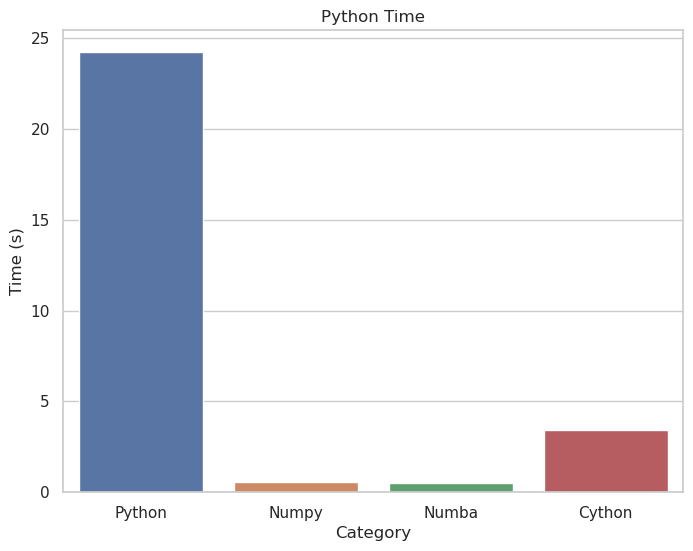

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

data = {
    'Category' : ['Python', 'Numpy', 'Numba', 'Cython'],
    'Value' : [time2, time3, time4, time5]}

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Category', y='Value', data=data)

# Add title and labels
bar_plot.set_title('Python Time')
bar_plot.set_xlabel('Category')
bar_plot.set_ylabel('Time (s)')

# Show the plot
plt.show()

/home/diogo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


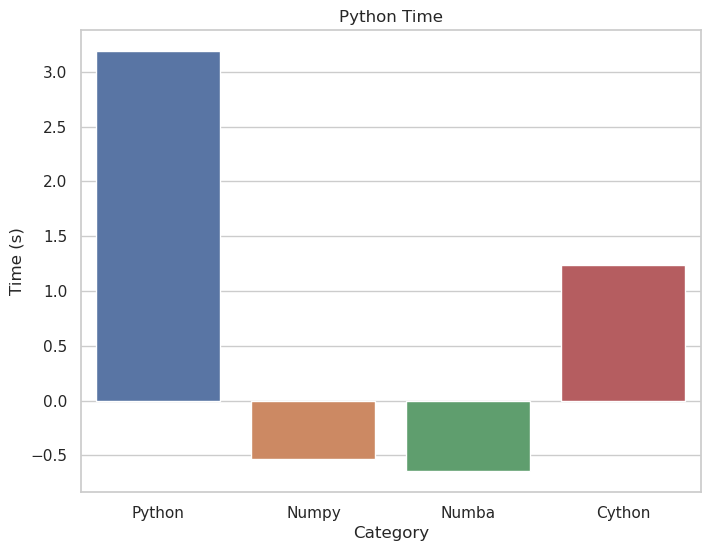

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

data = {
    'Category' : ['Python', 'Numpy', 'Numba', 'Cython'],
    'Value' : np.log(np.array([time2, time3, time4, time5]))}

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Category', y='Value', data=data)

# Add title and labels
bar_plot.set_title('Python Time')
bar_plot.set_xlabel('Category')
bar_plot.set_ylabel('Time (s)')

# Show the plot
plt.show()